In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Ignore all warning messages during execution


In [ ]:
import tensorflow as tf  # Import TensorFlow library


In [ ]:
from google.colab import drive  # Importing the drive module from google.colab library
drive.mount('/content/drive')    # Mounting Google Drive to the '/content/drive' directory


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DATA PRE- PROCESSING

DATA AUGUMENTATION

We have the dataset containing fire and smoke in which we have somke images of 12000 in number and fire images of 1000 in order to fetch more images we use data augumentation. By using this we can get more number of images from one image.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #importing necessary library for data augumentation

In [ ]:
import os                    # Importing the os module for operating system related functionalities
from pathlib import Path    # Importing the Path class from the pathlib module for working with file paths
from keras.preprocessing import image  # Importing the image module from Keras for image preprocessing
import matplotlib.pyplot as plt       # Importing the pyplot module from Matplotlib for plotting
import shutil                # Importing the shutil module for high-level file operations
import glob                  # Importing the glob module for searching directories with wildcards


In [ ]:
training_data_path ='/content/drive/MyDrive/DLProject/train_data'

we need to train the model, validate the model, and then test the model. But we have only training and testing data but not validation data. For this we split training data into training data and validation data with the ratio 10%

In the above cell we are generating 7 images for 1 image in data by flipping it horizontally,vertically,zooming,shear range,shift range,rescaling

Convertion of image data into array and giving labels to it

In [ ]:
import numpy as np              # Importing NumPy for numerical computing
import matplotlib.pyplot as plt # Importing Matplotlib for plotting
import pandas as pd             # Importing Pandas for data manipulation

from keras.layers import Dense, Flatten  # Importing layers for defining neural network architecture
from keras.models import Model            # Importing Model class for defining neural network models
from keras.applications.inception_v3 import InceptionV3, preprocess_input  # Importing InceptionV3 model and preprocessing function
from keras.preprocessing.image import ImageDataGenerator                  # Importing ImageDataGenerator for data augmentation
import keras                          # Importing Keras deep learning library


In [ ]:
batch_size=16

training_datagenarator= ImageDataGenerator(featurewise_center = True,
                                           rotation_range = 0.4,
                                           width_shift_range = 0.3,
                                           horizontal_flip = True,
                                           preprocessing_function=
                                           preprocess_input,
                                           zoom_range = 0.4,
                                           shear_range = 0.4,
                                           validation_split=0.1)

In [ ]:
training_data_path ='/content/drive/MyDrive/DLProject/train_data'
train=training_datagenarator.flow_from_directory(training_data_path,target_size=(256, 256),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory("/content/drive/MyDrive/DLProject/train_data",
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')

Found 12599 images belonging to 2 classes.
Found 1399 images belonging to 2 classes.


In [ ]:
train.class_indices

{'train-smoke': 0, 'train_fire': 1}

In [ ]:
t_img, label = train.next()

In [ ]:
t_img.shape

(16, 256, 256, 3)

In [ ]:
def plotImages(img_arr, label):
  """
  input: image array
  output: plot images
  """
  for idx , img in enumerate(img_arr):

    if idx <= 10:
      plt.figure(figsize = (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()

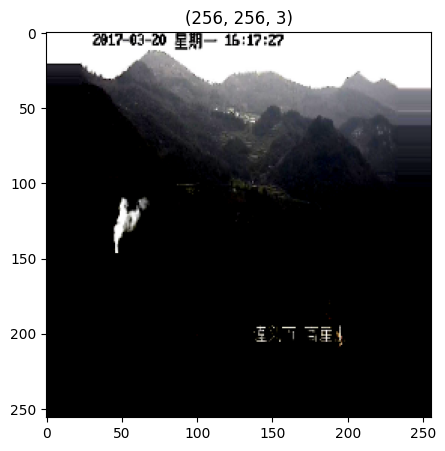

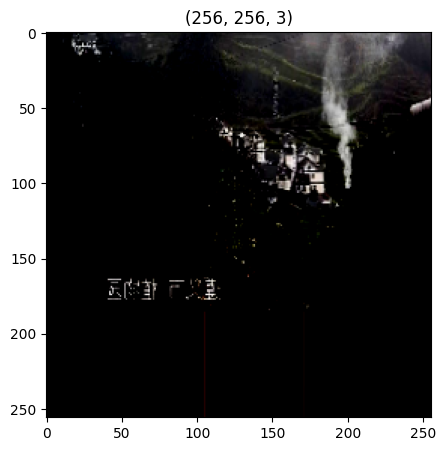

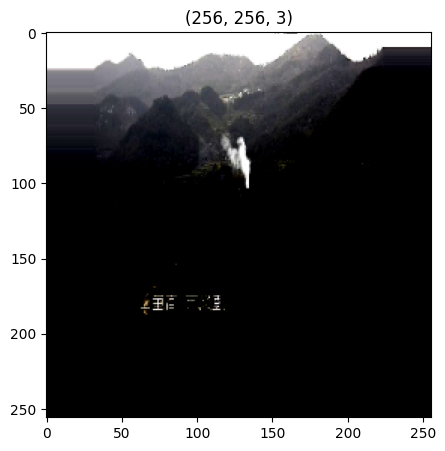

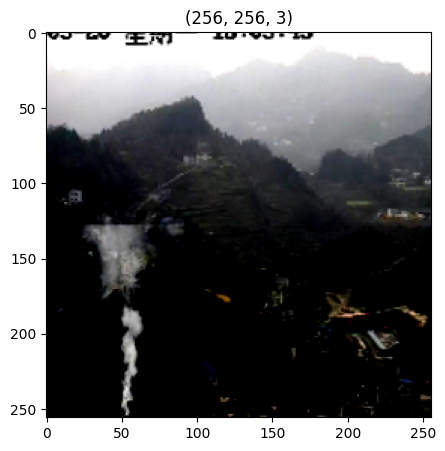

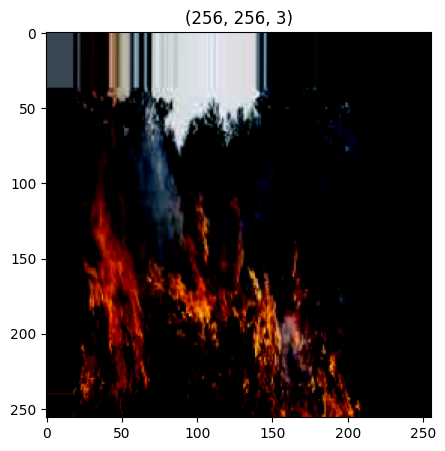

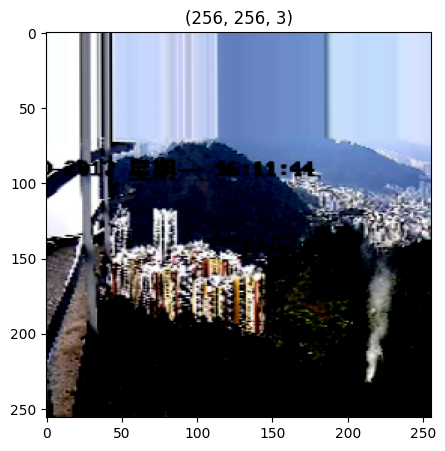

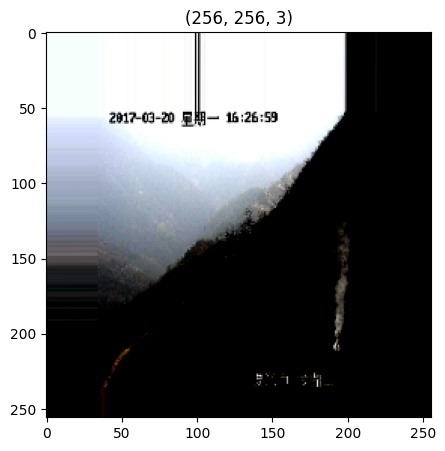

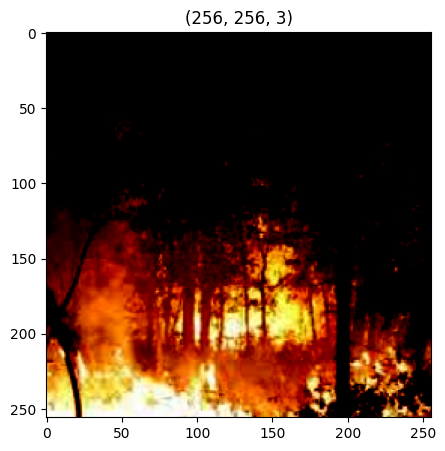

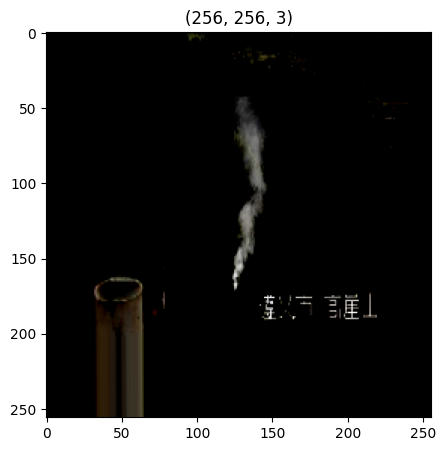

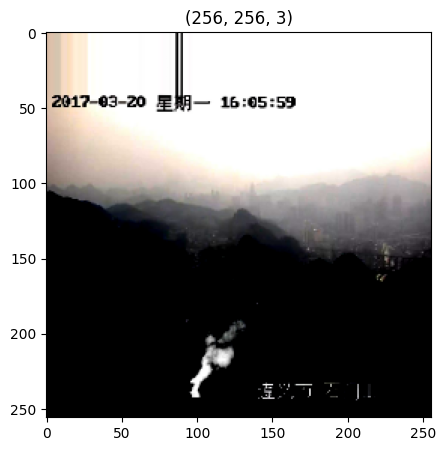

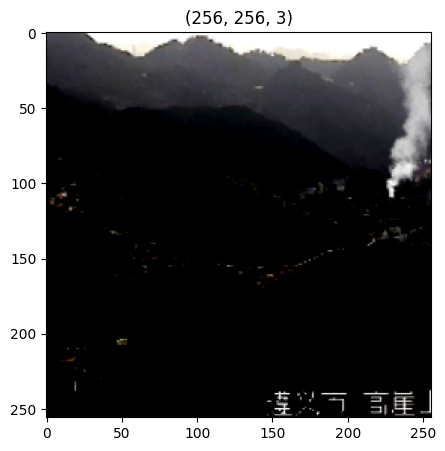

In [ ]:
plotImages(t_img, label)

Model Check Point

In [ ]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

In [ ]:
# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [ ]:
# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

In [ ]:
# Flattening
cnn.add(tf.keras.layers.Flatten())

In [ ]:
# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 262144)            0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("/content/cnn/model_checkpoints.h5",
                             monitor='val_loss',
                             mode="min",
                             save_best_only=True)
callbacks = checkpoint

In [ ]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

his = cnn.fit_generator(train,
                  epochs=10,
                  steps_per_epoch= 5,
                  callbacks=callbacks
                 )

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 0.2405 - accuracy: 0.9875

5/5 [==============================] - 30s 5s/step - loss: 0.2405 - accuracy: 0.9875
Epoch 2/10
5/5 [==============================] - ETA: 0s - loss: 0.1968 - accuracy: 0.9625

5/5 [==============================] - 27s 5s/step - loss: 0.1968 - accuracy: 0.9625
Epoch 3/10
5/5 [==============================] - ETA: 0s - loss: 0.2101 - accuracy: 0.9375

5/5 [==============================] - 27s 5s/step - loss: 0.2101 - accuracy: 0.9375
Epoch 4/10
5/5 [==============================] - ETA: 0s - loss: 0.1009 - accuracy: 0.9750

5/5 [==============================] - 27s 5s/step - loss: 0.1009 - accuracy: 0.9750
Epoch 5/10
5/5 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9625

5/5 [==============================] - 27s 5s/step - loss: 0.0984 - accuracy: 0.9625
Epoch 6/10
5/5 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9750

5/5 [==============================] - 27s 5s/step - loss: 0.0720 - accuracy: 0.9750
Epoch 7/10
5/5 [==============================] - ETA: 0s - loss: 0.2220 - accuracy: 0.9875

5/5 [==============================] - 29s 6s/step - loss: 0.2220 - accuracy: 0.9875
Epoch 8/10
5/5 [==============================] - ETA: 0s - loss: 0.1571 - accuracy: 0.9625

5/5 [==============================] - 31s 6s/step - loss: 0.1571 - accuracy: 0.9625
Epoch 9/10
5/5 [==============================] - ETA: 0s - loss: 0.2091 - accuracy: 0.9250

5/5 [==============================] - 26s 5s/step - loss: 0.2091 - accuracy: 0.9250
Epoch 10/10
5/5 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9750

5/5 [==============================] - 27s 5s/step - loss: 0.0471 - accuracy: 0.9750


In [ ]:
# Save the model
cnn.save('fire_smoke_detector_model.h5')

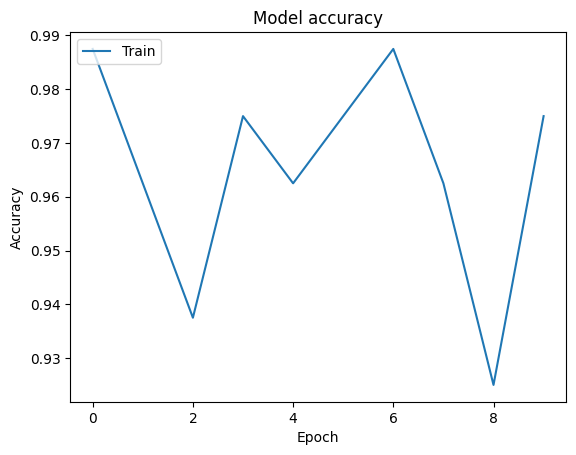

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(his.history['accuracy']) # plotting accuracy
plt.title('Model accuracy') #  naming the  visualization with model accuracy as title
plt.xlabel('Epoch') # epoch is represented on x-axis
plt.ylabel('Accuracy') # accuracy is represented on y-axis
plt.legend(['Train', 'Validation'], loc='upper left') # the legend indiactes which line represents train, validation accuracy
plt.show()

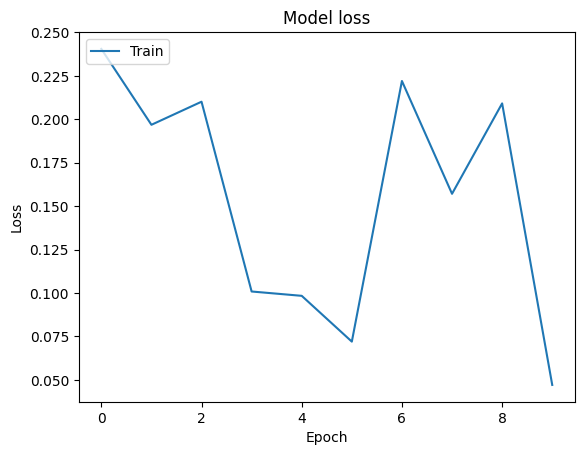

In [ ]:
# Plot training & validation loss values
plt.plot(his.history['loss'])# plotting loss
plt.title('Model loss')#  naming the  visualization with model loss as title
plt.xlabel('Epoch')# epoch is represented on x-axis
plt.ylabel('Loss')# accuracy is represented on y-axis
plt.legend(['Train', 'Validation'], loc='upper left')# the legend indiactes which line represents train, validation accuracy
plt.show()

In [ ]:
test_data = '/content/drive/MyDrive/DLProject/test_small'
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    directory=test_data,
    target_size=(256, 256),  # Replace with your image dimensions
    batch_size=batch_size,
    class_mode='binary'  # Adjust class mode if using different labels
)

Found 22 images belonging to 2 classes.


In [ ]:
y_pred = model.predict(test_generator)

2/2 [==============================] - 3s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # imports confusion matrix function that computes the confusion matrix for the model

y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, y_pred_classes)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73        12
           1       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         0

    accuracy                           0.55        22
   macro avg       0.19      0.33      0.24        22
weighted avg       0.31      0.55      0.40        22



[[12  0  0]
 [ 9  0  1]
 [ 0  0  0]]


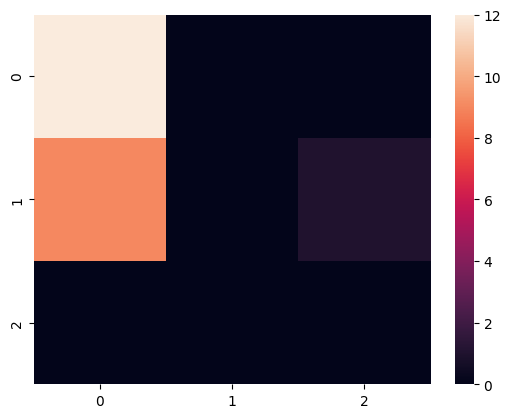

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix)
print(conf_matrix)

In [ ]:
from tensorflow.keras.models import load_model  # the function that helps with loading the previously built model

# Load the trained model
model = load_model('/content/fire_smoke_detector_model.h5')

In [ ]:
from PIL import Image

In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Convert to RGB mode
    image = image.resize((256, 256))  # Resize to match the input size of the model
    image_array = np.array(image) / 255.0  # Normalize pixel values
    image_array = np.expand_dims(image_array, axis=0)  # Adding batch dimension
    return image_array

In [ ]:
# Make predictions
def predict_test(image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    test_labels = ['Fire','Smoke'] # all the 2 classes present in the data
    predicted_test = test_labels[np.argmax(prediction)]
    print('Predicted feature:', predicted_test)
    print('Raw Prediction:', prediction)
    return predicted_test, prediction

In [ ]:
image_path = r'/content/drive/MyDrive/DLProject/test_small/Fire/fire1.png'
prediction_test, pretdiction = predict_test(image_path)


1/1 [==============================] - 0s 60ms/step
Predicted feature: Fire
Raw Prediction: [[0.04338927]]


In [ ]:
image_path = r'/content/drive/MyDrive/DLProject/test_small/Smoke/smoke11.png'
prediction_test, pretdiction = predict_test(image_path)

1/1 [==============================] - 0s 63ms/step
Predicted feature: Fire
Raw Prediction: [[0.22962186]]


In [ ]:
image_path = r'/content/drive/MyDrive/DLProject/train_data/train_fire/9.png'
prediction_test, pretdiction = predict_test(image_path)

1/1 [==============================] - 0s 100ms/step
Predicted feature: Fire
Raw Prediction: [[0.6179947]]


RESNET

In [ ]:
cfg0_conv_input = keras.Input(shape=(56,56,64), name='cfg0_conv')
x = keras.layers.Conv2D(64, kernel_size=1, strides=1, activation='relu', padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (cfg0_conv_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=1, strides=1, padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

cfg0_conv_input_transform = keras.layers.Conv2D(256, kernel_size=1, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (cfg0_conv_input)
cfg0_conv_input_op = keras.layers.BatchNormalization()(cfg0_conv_input_transform)
x = keras.layers.Add()([x, cfg0_conv_input_op])
cfg0_conv_output = keras.layers.ReLU()(x)

cfg0_conv = keras.Model(inputs=cfg0_conv_input, outputs=cfg0_conv_output, name='cfg0_conv')




cfg0_identity_input = keras.Input(shape=(56, 56, 256), name='cfg0_identity')
x = keras.layers.Conv2D(64, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (cfg0_identity_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Add()([x, cfg0_identity_input])
cfg0_identity_output = keras.layers.ReLU()(x)

cfg0_identity = keras.Model(inputs=cfg0_identity_input, outputs=cfg0_identity_output, name='cfg0_identity_p1')




cfg0_input = keras.Input(shape=(56, 56, 64), name='cfg0')
x = cfg0_conv(cfg0_input)
x = cfg0_identity(x)
cfg0_output = cfg0_identity(x)

cfg0 = keras.Model(inputs=cfg0_input, outputs=cfg0_output, name='cfg0_block')

In [ ]:
cfg1_conv_input = keras.Input(shape=(56, 56, 256), name='cfg1_conv')
x = keras.layers.Conv2D(128, kernel_size=1, strides=2, activation='relu', padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (cfg1_conv_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(512, kernel_size=1, strides=1, padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

cfg1_conv_input_transform = keras.layers.Conv2D(512, kernel_size=1, strides=2, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (cfg1_conv_input)
cfg1_conv_input_output = keras.layers.BatchNormalization()(cfg1_conv_input_transform)
x = keras.layers.Add()([x, cfg1_conv_input_output])
cfg1_conv_output = keras.layers.ReLU()(x)

cfg1_conv = keras.Model(inputs=cfg1_conv_input, outputs=cfg1_conv_output, name='cfg1_conv')




cfg1_identity_input = keras.Input(shape=(28, 28, 512), name='cfg1_identity')
x = keras.layers.Conv2D(128, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (cfg1_identity_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(512, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Add()([x, cfg1_identity_input])
cfg1_identity_output = keras.layers.ReLU()(x)

cfg1_identity = keras.Model(inputs=cfg1_identity_input, outputs=cfg1_identity_output, name='cfg1_identity_p1')


cfg1_input = keras.Input(shape=(56, 56, 256), name='cfg1')
x = cfg1_conv(cfg1_input)
x = cfg1_identity(x)
x = cfg1_identity(x)
cfg1_output = cfg1_identity(x)

cfg1 = keras.Model(inputs=cfg1_input, outputs=cfg1_output, name='cfg1_block')

In [ ]:
cfg2_conv_input = keras.Input(shape=(28, 28, 512), name='cfg2_conv')
x = keras.layers.Conv2D(256, kernel_size=1, strides=2, activation='relu', padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (cfg2_conv_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(1024, kernel_size=1, strides=1, padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

cfg2_conv_input_transform = keras.layers.Conv2D(1024, kernel_size=1, strides=2, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (cfg2_conv_input)
cfg2_conv_input_output = keras.layers.BatchNormalization()(cfg2_conv_input_transform)
x = keras.layers.Add()([x, cfg2_conv_input_output])
cfg2_conv_output = keras.layers.ReLU()(x)

cfg2_conv = keras.Model(inputs=cfg2_conv_input, outputs=cfg2_conv_output, name='cfg2_conv')




cfg2_identity_input = keras.Input(shape=(14, 14, 1024), name='cfg2_identity')
x = keras.layers.Conv2D(256, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (cfg2_identity_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, strides=1, padding='same', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(1024, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Add()([x, cfg2_identity_input])
cfg2_identity_output = keras.layers.ReLU()(x)

cfg2_identity = keras.Model(inputs=cfg2_identity_input, outputs=cfg2_identity_output, name='cfg2_identity_p1')


cfg2_input = keras.Input(shape=(28, 28, 512), name='cfg2')
x = cfg2_conv(cfg2_input)
x = cfg2_identity(x)
x = cfg2_identity(x)
x = cfg2_identity(x)
x = cfg2_identity(x)
cfg2_output = cfg2_identity(x)

cfg2 = keras.Model(inputs=cfg2_input, outputs=cfg2_output, name='cfg2_block')

In [ ]:
cfg3_conv_input = keras.Input(shape=(14, 14, 1024), name='cfg3_conv')
x = keras.layers.Conv2D(512, kernel_size=1, strides=2, activation='relu', padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (cfg3_conv_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(512, kernel_size=3, strides=1, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(2048, kernel_size=1, strides=1, padding='valid', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

cfg3_conv_input_transform = keras.layers.Conv2D(2048, kernel_size=1, strides=2, activation='relu', padding='same', kernel_constraint=keras.constraints.max_norm(2.)) (cfg3_conv_input)
cfg3_conv_input_output = keras.layers.BatchNormalization()(cfg3_conv_input_transform)
x = keras.layers.Add()([x, cfg3_conv_input_output])
cfg3_conv_output = keras.layers.ReLU()(x)

cfg3_conv = keras.Model(inputs=cfg3_conv_input, outputs=cfg3_conv_output, name='cfg3_conv')




cfg3_identity_input = keras.Input(shape=(7, 7, 2048), name='cfg3_identity')
x = keras.layers.Conv2D(512, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (cfg3_identity_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(512, kernel_size=3, strides=1, padding='same', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(2048, kernel_size=1, strides=1, padding='valid', activation='relu', kernel_constraint=keras.constraints.max_norm(2.)) (x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Add()([x, cfg3_identity_input])
cfg3_identity_output = keras.layers.ReLU()(x)

cfg3_identity = keras.Model(inputs=cfg3_identity_input, outputs=cfg3_identity_output, name='cfg3_identity_p1')


cfg3_input = keras.Input(shape=(14, 14, 1024), name='cfg3')
x = cfg3_conv(cfg3_input)
x = cfg3_identity(x)
cfg3_output = cfg3_identity(x)

cfg3 = keras.Model(inputs=cfg3_input, outputs=cfg3_output, name='cfg3_block')

In [ ]:
classifier_input = keras.Input(shape=(7, 7, 2048), name='classifier')
x = keras.layers.AveragePooling2D(pool_size=2, padding='same')(classifier_input)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Flatten()(x)
classifier_output = keras.layers.Dense(2, activation='softmax', kernel_constraint=keras.constraints.max_norm(2.))(x)

classifier = keras.Model(inputs=classifier_input, outputs=classifier_output, name='classifier')

In [ ]:
imageAug = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomContrast(0.2)
])

Model: "resnet50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 conv2d_138 (Conv2D)         (None, 112, 112, 64)      9472      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 cfg0_block (Functional)     (None, 56, 56, 256)       148480    
                                                                 
 cfg1_block (Functional)     (None, 28, 28, 512)       665600    
                                                          

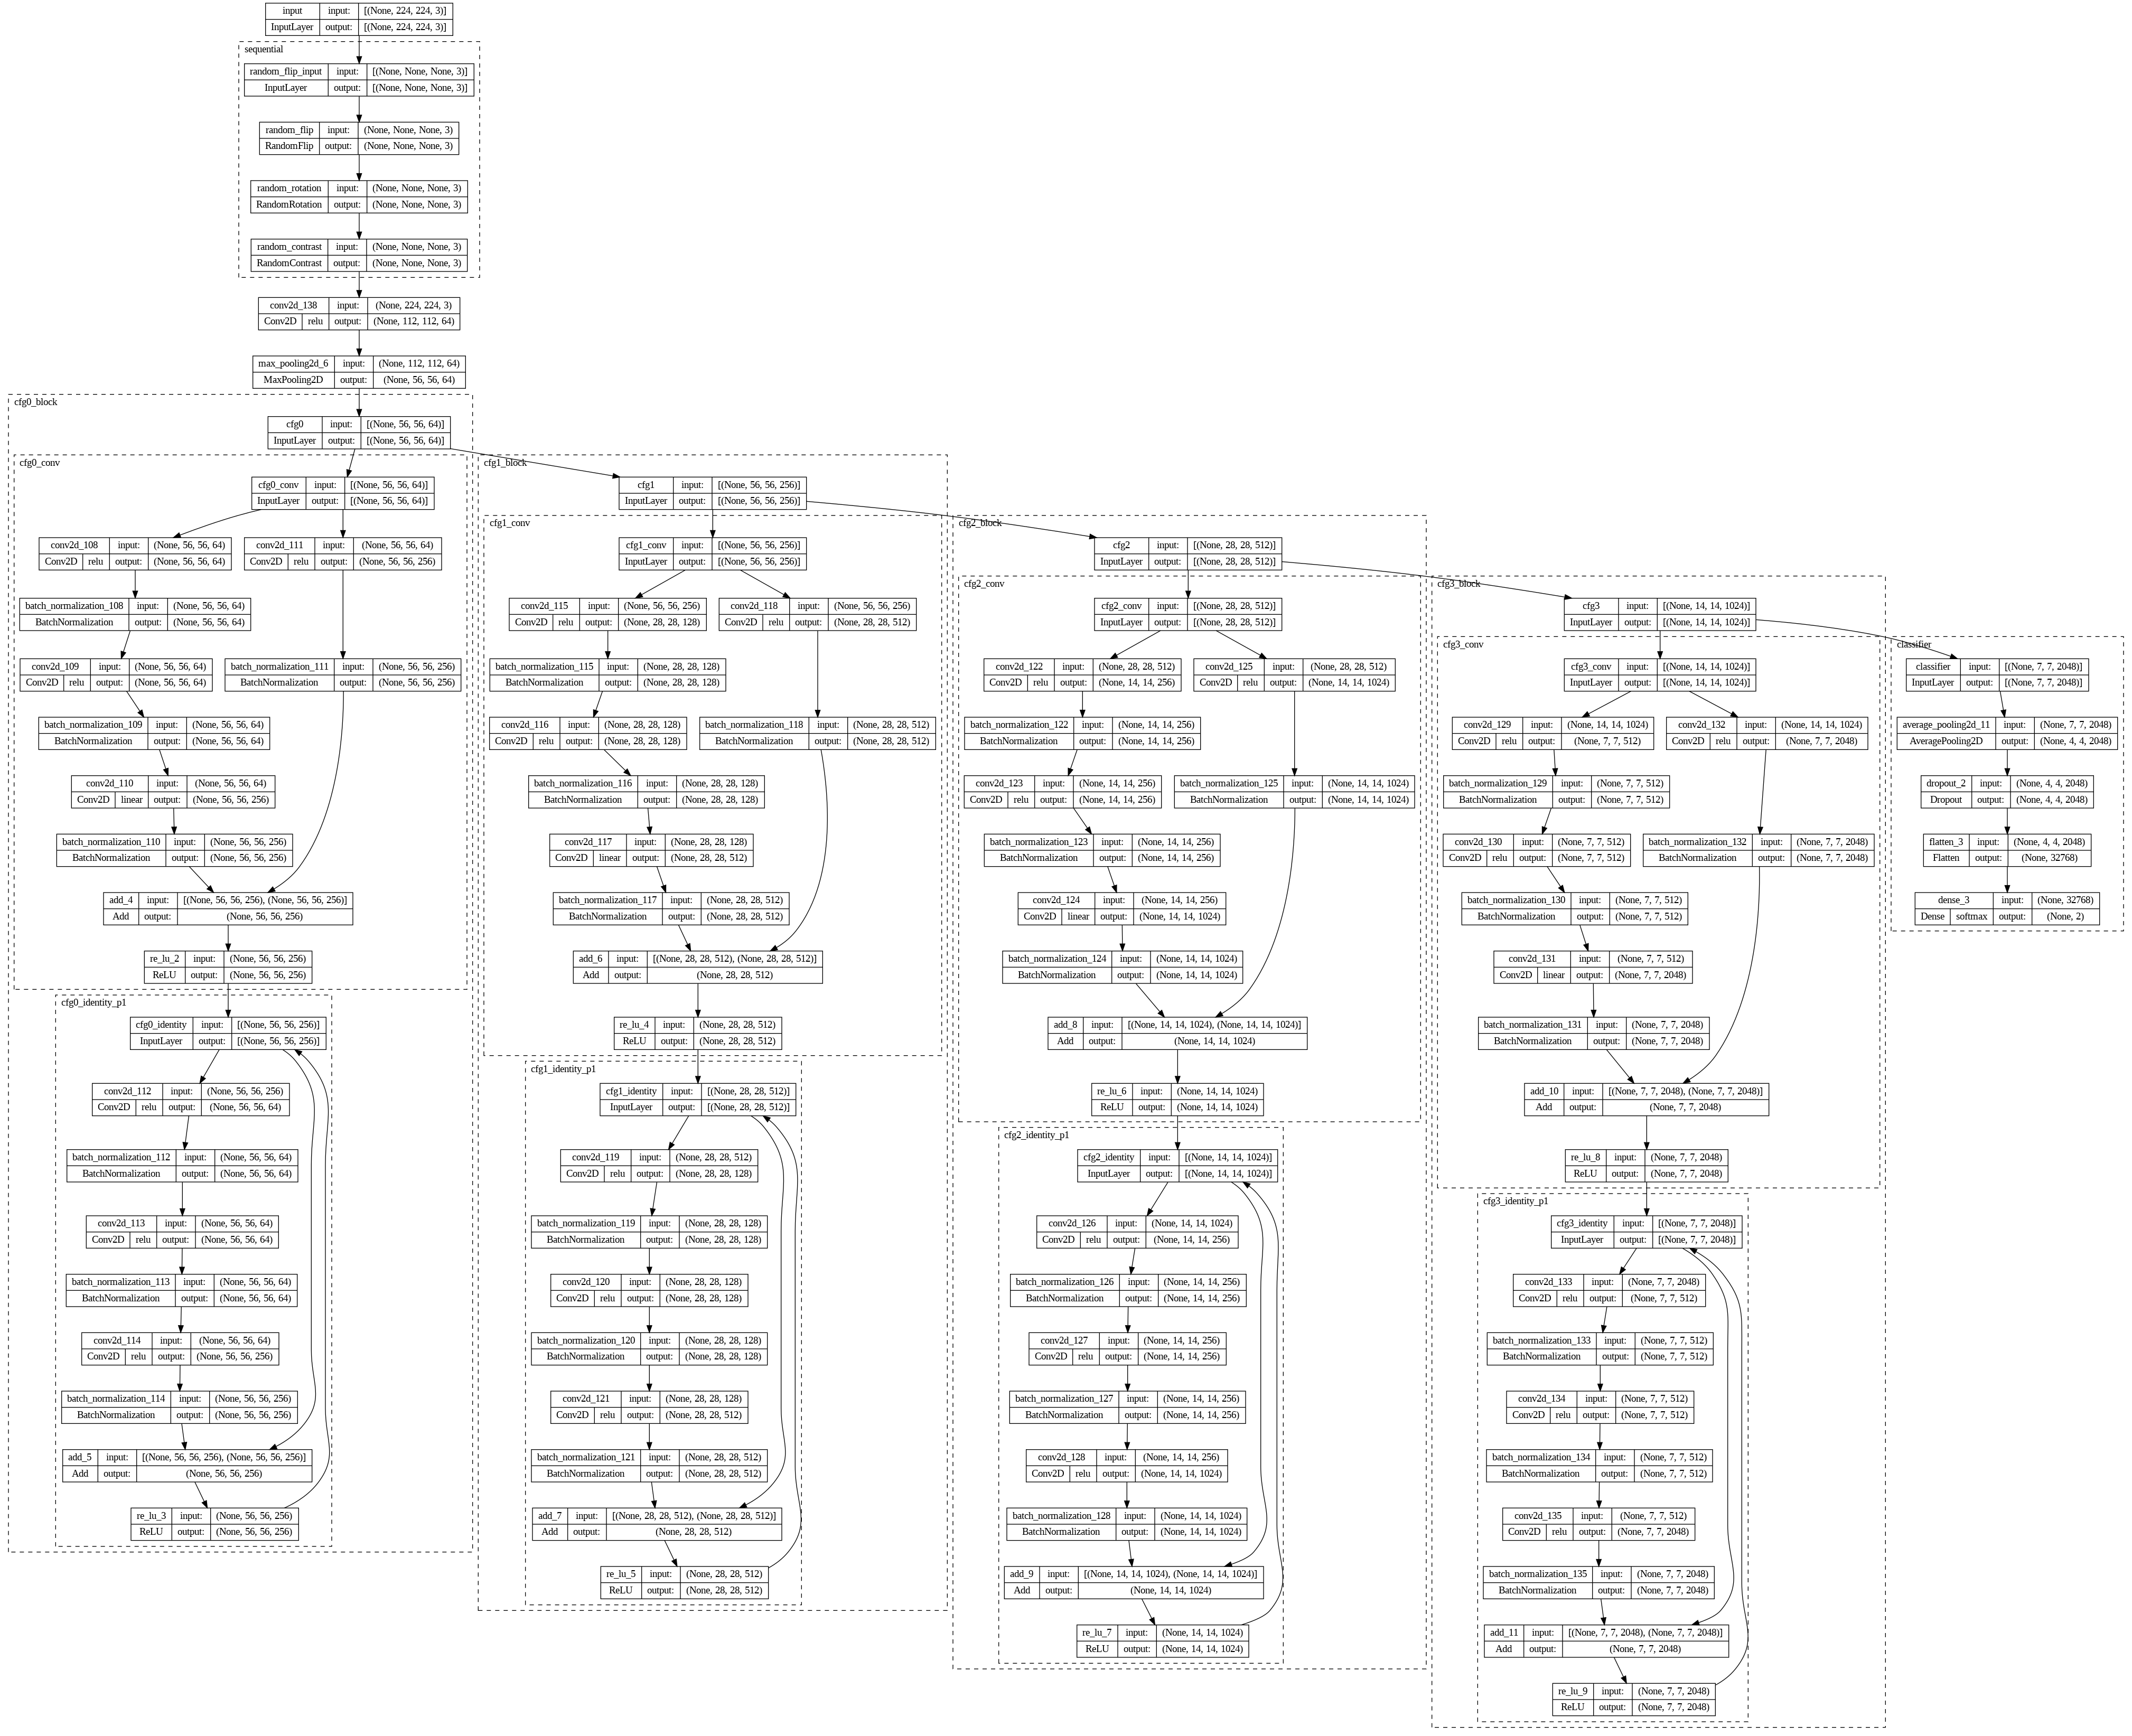

In [ ]:
def build_resnet_model():
    resnet_input = keras.Input(shape=(224, 224, 3), name='input')
    x = imageAug(resnet_input)
    x = keras.layers.Conv2D(64, kernel_size=7, activation='relu', padding='same', strides=2, kernel_constraint=keras.constraints.max_norm(2.))(x)
    conv1_output = keras.layers.MaxPooling2D(pool_size=3, padding='same', strides=2) (x)
    x = cfg0(conv1_output)
    x = cfg1(x)
    x = cfg2(x)
    x = cfg3(x)
    model_output = classifier(x)
    resnet_model = keras.Model(inputs=resnet_input, outputs=model_output, name='resnet50')

    print(resnet_model.summary())

    resnet_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )

    return resnet_model
model = build_resnet_model()


keras.utils.plot_model(model, show_shapes=True, rankdir='TB', show_layer_activations=True, expand_nested=True)



keras.utils.plot_model(model, show_shapes=True, rankdir='TB', show_layer_activations=True, expand_nested=True)


In [ ]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='./checkpoint_{epoch:02d}.hdf5',
        monitor='val_loss',
        verbose=0,
        save_best_only=True,
        mode='auto',
        save_freq='epoch',
        options=None,
        initial_value_threshold=None
    )
]

In [ ]:
history = model.fit(
    x=train,
    validation_data=validation,
    callbacks=callbacks_list,
    epochs=5,
    steps_per_epoch = 5
)

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 1.8730 - accuracy: 0.9375 

In [ ]:
model = keras.models.load_model('./checkpoint_18.hdf5')

In [ ]:
results = model.evaluate(test)
print(f"Results : {results}")